In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

from random import random, choice
from gym import Env
from core import Agent
import gym
from gridworld import WindyGridWorld, SimpleGridWorld
from utils import str_key, set_dict, get_dict
from utils import epsilon_greedy_pi, epsilon_greedy_policy
from utils import greedy_policy, learning_curve

## Sarsa算法
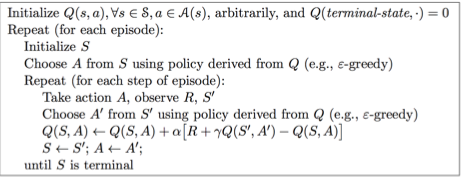

In [2]:
# Sarsa
class SarsaAgent(Agent):
    def __init__(self, env: Env, capacity: int = 20000):
        super(SarsaAgent, self).__init__(env, capacity)
        self.Q = {}  # 存储状态行为对

    # epsilon_贪婪策略
    def policy(self, A, s, Q, epsilon):
        return epsilon_greedy_policy(A, s, Q, epsilon)

    def learning_method(self, gamma = 0.9, alpha = 0.1, epsilon = 1e-5, display = False, lambda_ = None):
        self.state = self.env.reset()
        s0 = self.state
        if display:
            self.env.render()
        a0 = self.perform_policy(s0, self.Q, epsilon)
        time_in_episode, total_reward = 0, 0
        is_done = False
        while not is_done:
            s1, r1, is_done, info, total_reward = self.act(a0)
            if display:
                self.env.render()
            a1 = self.perform_policy(s1, self.Q, epsilon)
            old_q = get_dict(self.Q, s0, a0)
            q_prime = get_dict(self.Q, s1, a1)
            td_target = r1 + gamma * q_prime
            new_q = old_q + alpha * (td_target - old_q)
            set_dict(self.Q, new_q, s0, a0)
            s0, a0 = s1, a1
            time_in_episode += 1
        if display:
            print(self.experience.last_episode)
        return time_in_episode, total_reward

## Sarsa

In [3]:
env = WindyGridWorld()
agent = SarsaAgent(env, capacity=10000)
#total_times, episode_rewards, num_episodes
statistics = agent.learning(gamma=1.0,
                            epsilon=1,
                            decaying_epsilon= True,
                            alpha=0.5,
                            max_episode_num = 800,
                            display=False)
agent.learning_method(epsilon=0.01, display= True)


100%|██████████| 800/800 [00:00<00:00, 1114.61it/s]


episode 800    20 steps,total reward:-19.00  


(20, -19)

No handles with labels found to put in legend.


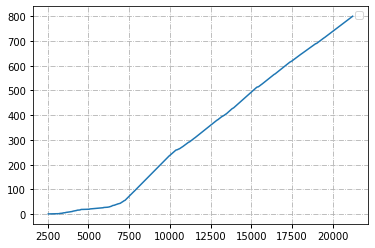

In [4]:
learning_curve(statistics, 0, 2)  # x:总step步数，y:完整序列的次数

In [5]:
env.reset()
env.render()
env.close()